<a href="https://colab.research.google.com/github/usta-cyber/Deep-Learning-using-python/blob/main/TiTanic_DataSet_Abishek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Titanic Dataset**
The Titanic dataset is a famous dataset that contains information about passengers aboard the Titanic ship, which sank in 1912 after colliding with an iceberg. The dataset is often used in data science and machine learning education and competitions as a starting point for exploring data analysis and predictive modeling techniques.

The Titanic dataset contains information about **1309** passengers, including their age, gender, ticket class, cabin, port of embarkation, and whether they survived or not. The goal of many analyses and models built on the Titanic dataset is to predict whether a given passenger would have survived the disaster.

The variables in the Titanic dataset are as follows:
**PassengerId: Unique identifier for each passenger
Survived: Whether the passenger survived (0 = No, 1 = Yes)
Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name: Passenger name
Sex: Passenger gender
Age: Passenger age
SibSp: Number of siblings/spouses aboard the Titanic
Parch: Number of parents/children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)**
As mentioned earlier, the main objective of many analyses and models built on the Titanic dataset is to predict whether a given passenger would have survived the disaster, based on their demographic and travel information. This is a **binary classification problem**, where the target variable is **Survived** and the predictors are the other variables in the dataset.

# Importing Libraries

In [103]:
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Data Loading

In [104]:
data=pd.read_csv('/content/titanic.csv')


In [105]:
data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Data Dimention:- No. of Rows and Columns

In [107]:
data.shape

(1309, 12)

In [108]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1309
Number of Columns 12


In [109]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# Get Overall Statistics About The Dataframe

In [110]:
data.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# Data Preprocessing & Data Cleaning

## Data Filtering

In [111]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [112]:
data[['Name','Age']]


,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",NaN
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",NaN


In [113]:
sum(data['Sex']=='male')


843

In [114]:
data[data['Sex']=='male'].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [115]:
sum(data['Survived']==1)


494

## Check Missing (Null) Values In The *Dataset*

In [116]:
data.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

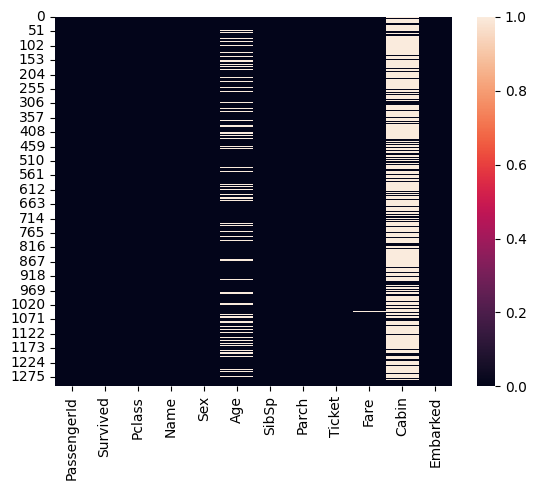

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())


In [118]:
per_missing = data.isnull().sum() * 100 / len(data)


## Drop the Column

In [119]:
data.drop('Cabin', axis=1,inplace=True)


In [120]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

## Handle Missing Values

In [121]:
data['Embarked'].mode()


0    S
Name: Embarked, dtype: object

In [122]:
data['Embarked'].fillna('S',inplace=True)


In [123]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [124]:
data['Age']


0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

In [125]:
data['Age'].fillna(data['Age'].mean(), inplace = True)


In [126]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [127]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [128]:
data['Sex'].unique()


array(['male', 'female'], dtype=object)

In [129]:
data['Gender']=data['Sex'].map({'male':1, 'female':0})


In [130]:
data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


# Data Encoding

In [131]:
x=data['Sex'].map({'male':1, 'female':0})


In [132]:
data['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [133]:
pd.get_dummies(data,columns=['Embarked'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,1,0,0,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,0,1,0,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,1,0,0,1
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,1,0,0,1


In [134]:
data1=pd.get_dummies(data,columns=['Embarked'],drop_first=True)


In [135]:
data1.head(1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,1,0,1


# Visual Analysis

## How Many People Survived And How Many Died?

In [136]:
data['Survived'].value_counts()


0    815
1    494
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

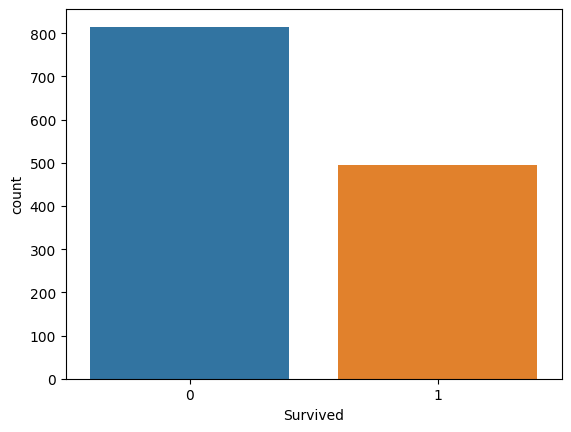

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived',data=data)


## How Many Passengers Were In First Class, Second Class, and Third Class?

In [138]:
data['Pclass'].value_counts()


3    709
1    323
2    277
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

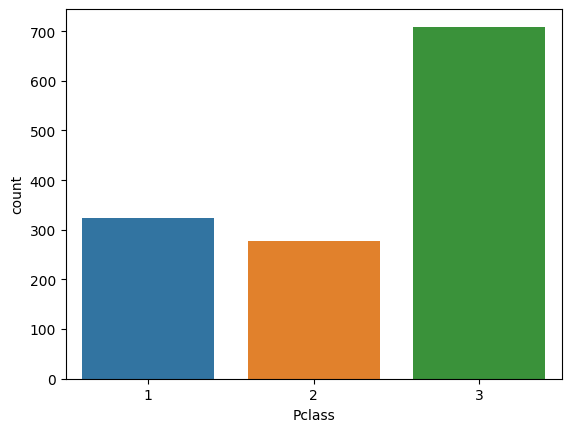

In [139]:
sns.countplot(x='Pclass', data=data)


## Number of Male And Female Passengers

In [140]:
data['Sex'].value_counts()


male      843
female    466
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

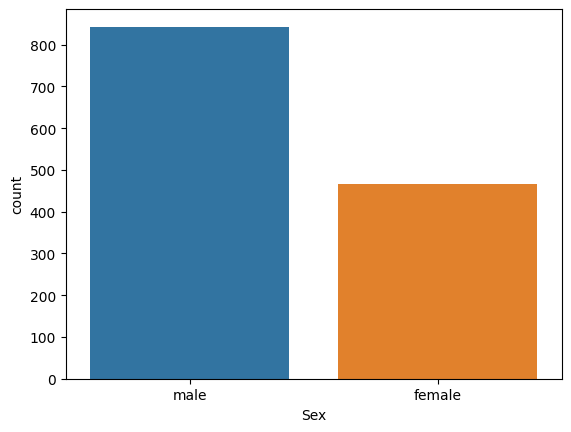

In [141]:
sns.countplot(x ='Sex', data = data)


(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

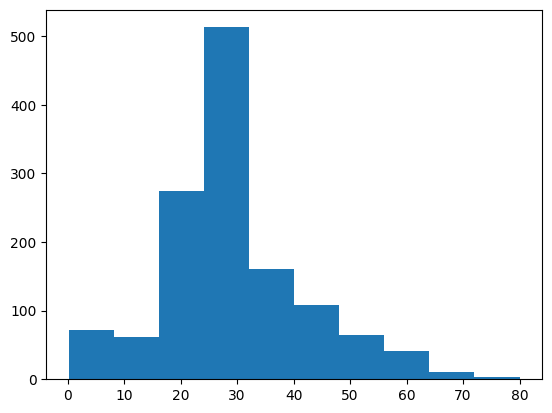

In [142]:
plt.hist(data['Age'])


#**12. Bivariate Analysis**




## How Has Better Chance of Survival Male or Female?

<Axes: xlabel='Sex', ylabel='Survived'>

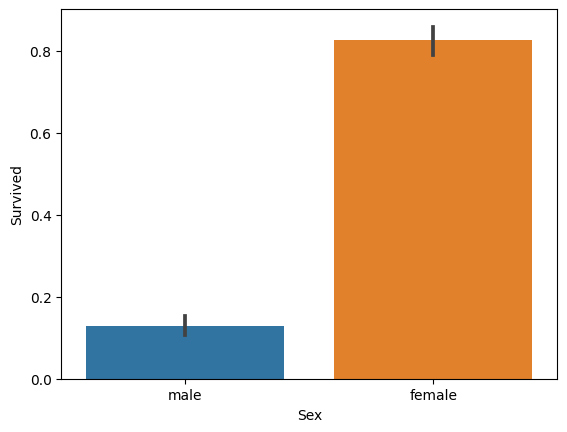

In [143]:
sns.barplot(x='Sex',y='Survived',data=data)


## Which Passenger Class Has Better Chance of Surviva(First, Second, Or Third Class)?

<Axes: xlabel='Pclass', ylabel='Survived'>

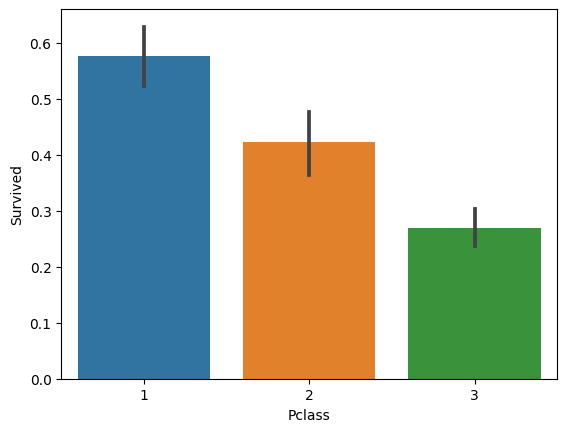

In [144]:
sns.barplot(x="Pclass", y="Survived",data=data)


In [145]:

# Convert categorical variables to numeric
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])
data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,0,1


In [146]:
data=data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [147]:
# Split the data into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

In [153]:
# Define the model
model = Sequential()
model.add(Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Define the model
model = Sequential()
model.add(Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)





Epoch 1/100
33/33 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6848
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 10/100
33/33 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6266
Epoch 11/100
33/33 [===================

In [152]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 60.69


In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a more complex model with more layers and neurons
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for a large number of epochs
history = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)


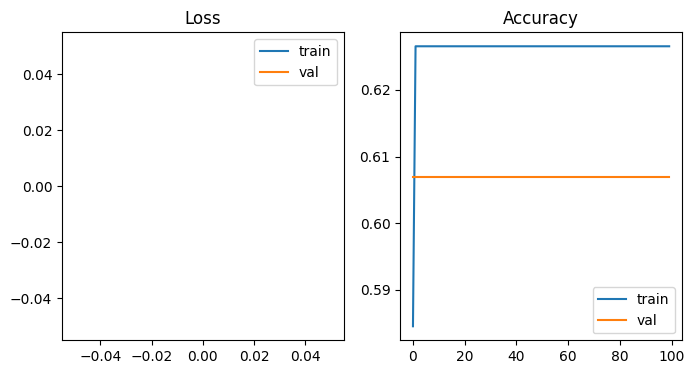

In [158]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.title('Accuracy')
plt.show()


In [159]:
# Evaluate the model on the test data
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 60.69
